In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv('India_Recovered_Cases_21.csv',index_col = 'Date')
df.head()

,Recovered
Date,
1/1/21,9929568
1/2/21,9927310
1/3/21,9946867
1/4/21,9975958
1/5/21,9997272


## Confirmed_Covid-19_Recovered_Cases_India_2021

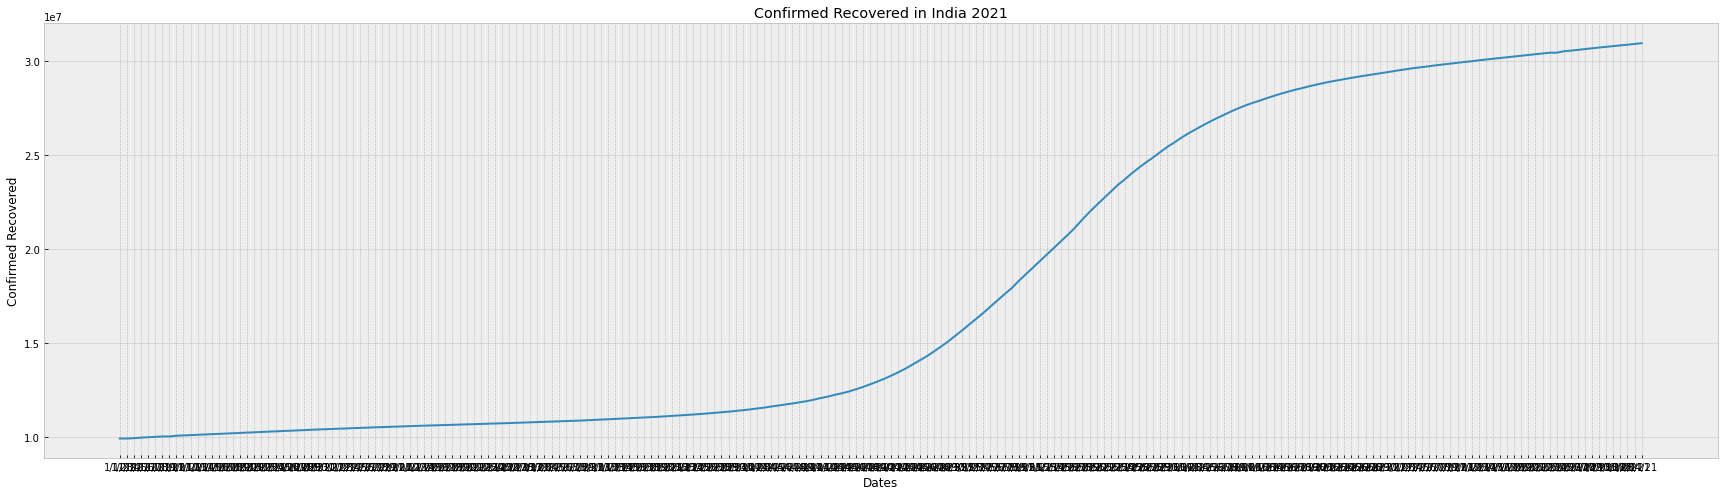

In [3]:
plt.figure(figsize=(30,8))
plt.title('Confirmed Recovered in India 2021')
plt.xlabel('Dates')
plt.ylabel('Confirmed Recovered')
plt.plot(df['Recovered'])
plt.show()

In [4]:
future_days = 25
df['Predicted Cases'] = df['Recovered'].shift(-future_days)
df.head()

,Recovered,Predicted Cases
Date,,
1/1/21,9929568,10359305.0
1/2/21,9927310,10373606.0
1/3/21,9946867,10394352.0
1/4/21,9975958,10409146.0
1/5/21,9997272,10423109.0


In [5]:
df.tail(25)

,Recovered,Predicted Cases
Date,,
7/11/21,30014713,NaN
7/12/21,30063720,NaN
7/13/21,30104659,NaN
7/14/21,30143850,NaN
7/15/21,30183876,NaN
7/16/21,30227792,NaN
7/17/21,30269796,NaN
7/18/21,30308456,NaN
7/19/21,30353710,NaN


In [6]:
X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]
print(X)

[[ 9929568]
 [ 9927310]
 [ 9946867]
 [ 9975958]
 [ 9997272]
 [10016859]
 [10037398]
 [10037398]
 [10075950]
 [10092909]
 [10111294]
 [10129111]
 [10146763]
 [10162738]
 [10179715]
 [10196885]
 [10211342]
 [10228753]
 [10245741]
 [10265706]
 [10283702]
 [10300838]
 [10316786]
 [10330084]
 [10345985]
 [10359305]
 [10373606]
 [10394352]
 [10409146]
 [10423109]
 [10434983]
 [10448406]
 [10462631]
 [10480455]
 [10496308]
 [10510796]
 [10522601]
 [10534505]
 [10548521]
 [10561608]
 [10573372]
 [10589230]
 [10600625]
 [10611731]
 [10621220]
 [10633025]
 [10644858]
 [10656845]
 [10667741]
 [10678048]
 [10689715]
 [10699410]
 [10712665]
 [10726702]
 [10738501]
 [10750680]
 [10763451]
 [10775169]
 [10786452]
 [10798921]
 [10812044]
 [10826075]
 [10839894]
 [10854126]
 [10868520]
 [10882798]
 [10899394]
 [10920046]
 [10938146]
 [10953303]
 [10973260]
 [10989897]
 [11007352]
 [11027543]
 [11045284]
 [11063025]
 [11083679]
 [11107332]
 [11130288]
 [11151468]
 [11181253]
 [11205160]
 [11231650]
 [11

/var/folders/n7/3q5192g500dbk8ndkh5r6l8r0000gn/T/ipykernel_48870/1809063324.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]


In [7]:
y = np.array(df['Predicted Cases'])[:-future_days]
print(y)

[10359305. 10373606. 10394352. 10409146. 10423109. 10434983. 10448406.
 10462631. 10480455. 10496308. 10510796. 10522601. 10534505. 10548521.
 10561608. 10573372. 10589230. 10600625. 10611731. 10621220. 10633025.
 10644858. 10656845. 10667741. 10678048. 10689715. 10699410. 10712665.
 10726702. 10738501. 10750680. 10763451. 10775169. 10786452. 10798921.
 10812044. 10826075. 10839894. 10854126. 10868520. 10882798. 10899394.
 10920046. 10938146. 10953303. 10973260. 10989897. 11007352. 11027543.
 11045284. 11063025. 11083679. 11107332. 11130288. 11151468. 11181253.
 11205160. 11231650. 11264637. 11295023. 11323762. 11355993. 11393021.
 11434301. 11474683. 11525039. 11569241. 11629289. 11682136. 11732279.
 11792135. 11851393. 11913292. 11990859. 12081443. 12156529. 12253697.
 12336036. 12429564. 12547866. 12671220. 12809638. 12953817. 13108565.
 13276039. 13454880. 13648159. 13867997. 14085110. 14304382. 14556089.
 14817240. 15086740. 15384418. 15684406. 15992271. 16292725. 16613292.
 16951

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [10]:
x_future = df.drop(['Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/var/folders/n7/3q5192g500dbk8ndkh5r6l8r0000gn/T/ipykernel_48870/3835655274.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Predicted Cases'], 1)[:-future_days]


array([[28491670],
       [28580647],
       [28678390],
       [28765738],
       [28844199],
       [28926038],
       [28994855],
       [29063740],
       [29128267],
       [29193085],
       [29251029],
       [29309607],
       [29366601],
       [29427330],
       [29488918],
       [29548302],
       [29605779],
       [29658078],
       [29700430],
       [29752294],
       [29799534],
       [29843825],
       [29888284],
       [29933538],
       [29975064]])

In [11]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[30014713. 30063720. 30104659. 30143850. 30143850. 30227792. 30227792.
 30308456. 30353710. 30390687. 30390687. 30468079. 30468079. 30543138.
 30579106. 30579106. 30701612. 30701612. 30743972. 30781263. 30820521.
 30857467. 30896354. 30974748. 30974748.]

[31951944.31036521 32045579.72115656 32148440.077844   32240361.20197498
 32322930.04522773 32409053.74442812 32481473.67389784 32553965.16352282
 32621870.48908036 32690082.05000817 32751059.72112423 32812704.58545249
 32872682.51910548 32936590.99952118 33001403.45307454 33063896.51571357
 33124382.73693989 33179419.86281485 33223989.21127384 33278568.56262624
 33328281.82342153 33374891.68866041 33421678.34957696 33469301.63289683
 33513001.73594055]


/var/folders/n7/3q5192g500dbk8ndkh5r6l8r0000gn/T/ipykernel_48870/301926271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted Cases'] = predictions


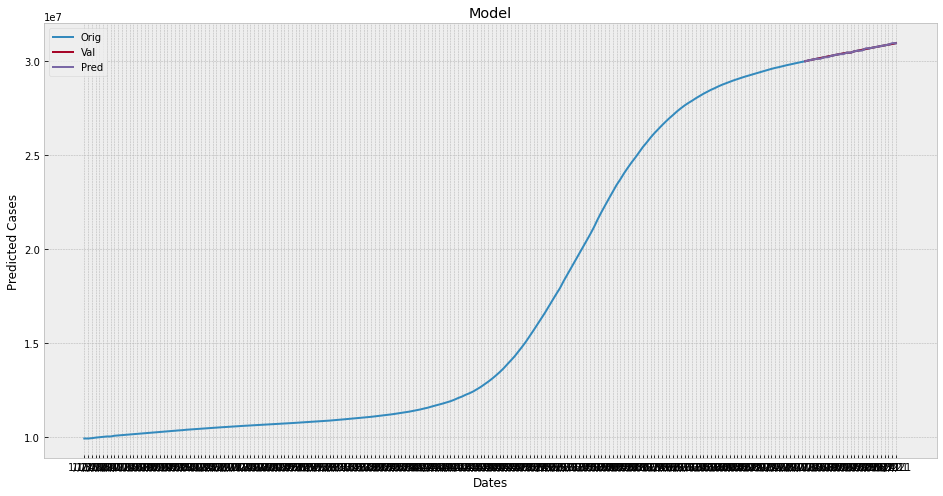

In [12]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df['Recovered'])
plt.plot(valid['Recovered'])
plt.plot(valid['Predicted Cases'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [13]:
valid

,Recovered,Predicted Cases
Date,,
7/11/21,30014713,30014713.0
7/12/21,30063720,30063720.0
7/13/21,30104659,30104659.0
7/14/21,30143850,30143850.0
7/15/21,30183876,30143850.0
7/16/21,30227792,30227792.0
7/17/21,30269796,30227792.0
7/18/21,30308456,30308456.0
7/19/21,30353710,30353710.0


In [14]:
from sklearn.metrics import r2_score
score = r2_score(valid['Recovered'], valid['Predicted Cases'])
print(score)

0.9951644069574251


<AxesSubplot:xlabel='Date'>

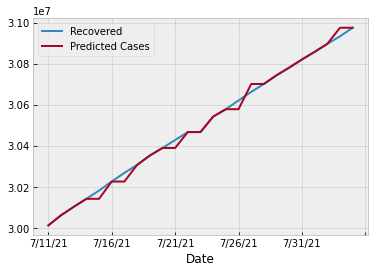

In [15]:
valid.plot()